## Name : Pranav Narkhede
### Assignment Celebal Week-8

### Dataset

   Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
   
   This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

- Loan_ID : Unique Loan ID

- Gender : Male/ Female

- Married : Applicant married (Y/N)

- Dependents : Number of dependents

- Education : Applicant Education (Graduate/ Under Graduate)

- Self_Employed : Self employed (Y/N)

- ApplicantIncome : Applicant income

- CoapplicantIncome : Coapplicant income

- LoanAmount : Loan amount in thousands of dollars

- Loan_Amount_Term : Term of loan in months

- Credit_History : Credit history meets guidelines yes or no

- Property_Area : Urban/ Semi Urban/ Rural

- Loan_Status : Loan approved (Y/N) this is the target variable
   


## Import modules

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Loading the dataset

In [161]:
df = pd.read_csv("archive (9)/Training Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [162]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [164]:
#Find Shape of Our Dataset
df.shape

(614, 13)

In [165]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [166]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Preprocessing

In [167]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [168]:
# fill missing values for numerical terms - mean

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [169]:
# fill the missing values for categorical terms - mode

df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

df['Married'] = df["Married"].fillna(df['Married'].mode()[0])

df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])

df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [170]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='count', ylabel='Gender'>

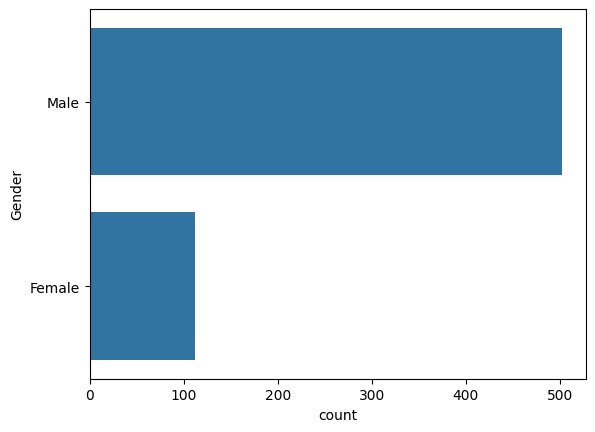

In [171]:
sns.countplot(df['Gender'])

Number of people who took loan by gender
Male      502
Female    112

<Axes: xlabel='count', ylabel='Married'>

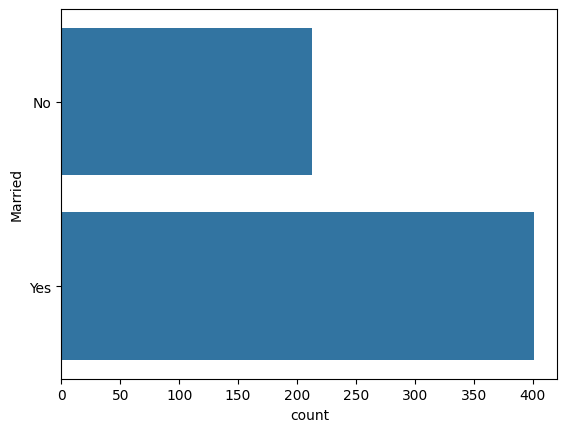

In [172]:
sns.countplot(df['Married'])

Married individuals are applying for home loan in large numbers.

Number of people who took loan by Married
Yes    401
No     213

<Axes: xlabel='Education', ylabel='count'>

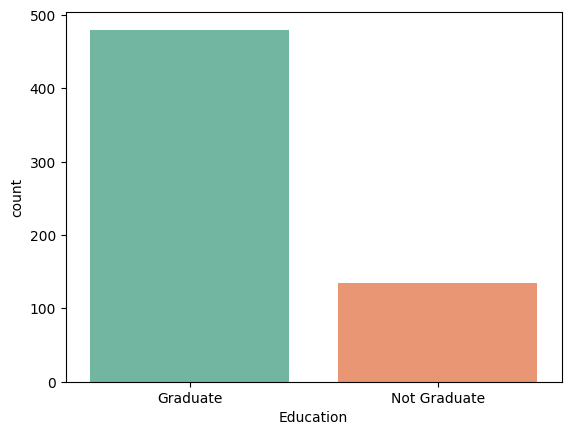

In [173]:
sns.countplot(x='Education', data=df, palette='Set2')


Graduates are applying in huge numbers for home loans

Number of people who took loan by Education
Graduate        480
Not Graduate    134

<Axes: xlabel='Self_Employed', ylabel='count'>

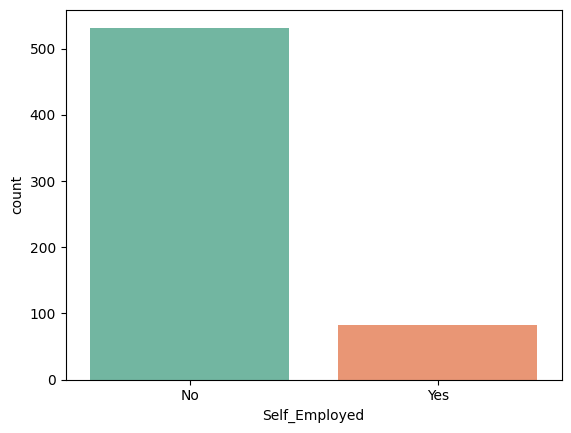

In [174]:
sns.countplot(x='Self_Employed', data=df, palette='Set2')


In our dataset, it appears that non-self-employed individuals are inclinded  more towards home loans compared to self-employed individuals. 







## Creation of new attributes

In [175]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Log Transformation

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

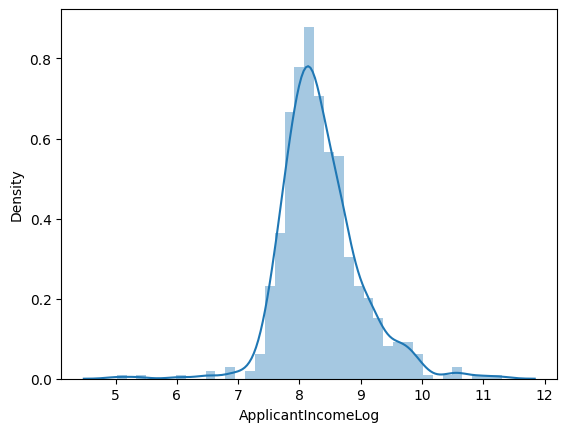

In [176]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

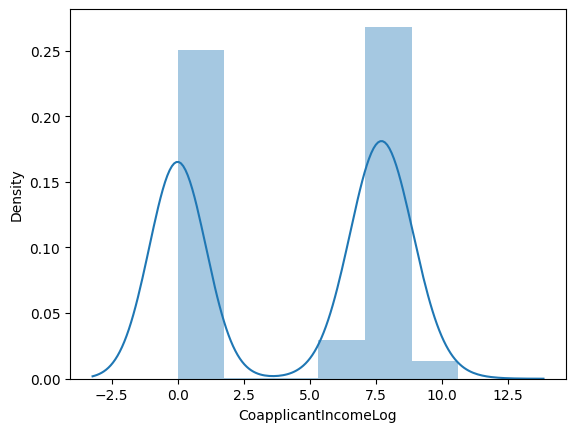

In [177]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

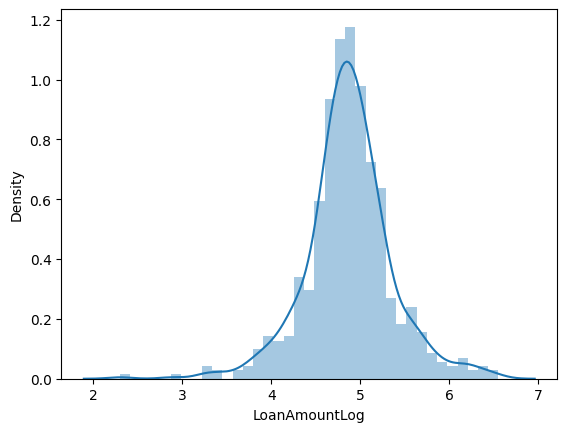

In [178]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

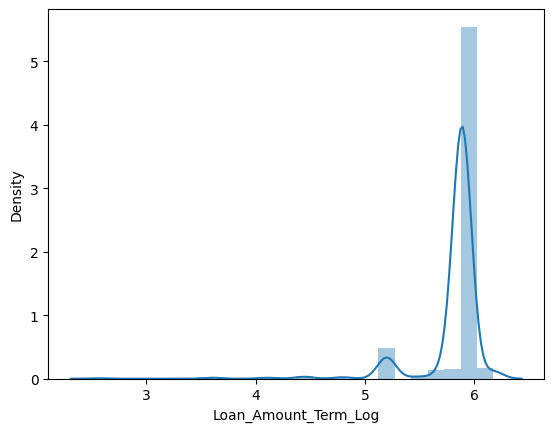

In [179]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

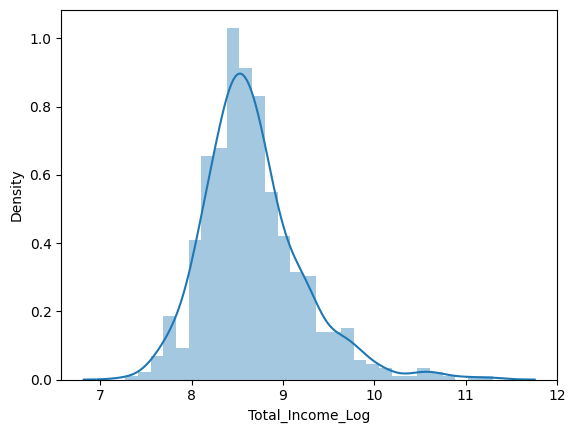

In [180]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

In [181]:
## drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,0.000000,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,7.319202,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,0.000000,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,7.765993,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,0.000000,4.955827,5.888878,8.699681


## Check Outlier

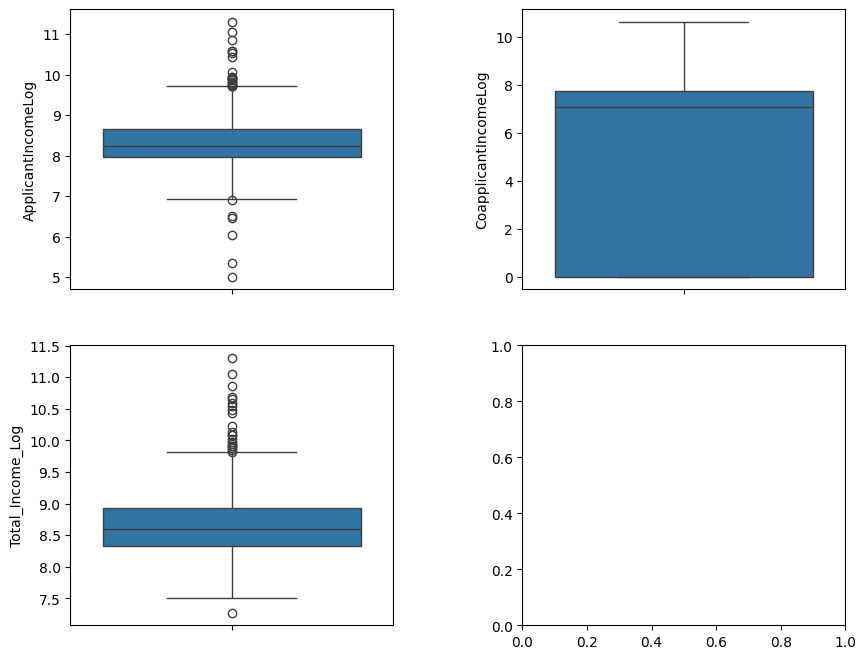

In [182]:
# Plotting the numerical cols as boxplot
fig, axs = plt.subplots(2,2, figsize = (10,8))
plt1 = sns.boxplot(df['ApplicantIncomeLog'], ax = axs[0,0])
plt2 = sns.boxplot(df['CoapplicantIncomeLog'], ax = axs[0,1])
plt2 = sns.boxplot(df['Total_Income_Log'], ax = axs[1,0])
plt.subplots_adjust(wspace=0.4)

## Outlier Removal

In [183]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column[(column >= Q1 - 1.5*IQR) & (column <= Q3 + 1.5*IQR)]

df['ApplicantIncomeLog'] = remove_outliers(df['ApplicantIncomeLog'])
df['CoapplicantIncomeLog'] = remove_outliers(df['CoapplicantIncomeLog'])
df['Total_Income_Log'] = remove_outliers(df['Total_Income_Log'])

# Removing null data
df = df.dropna().reset_index().drop('index', axis=1)

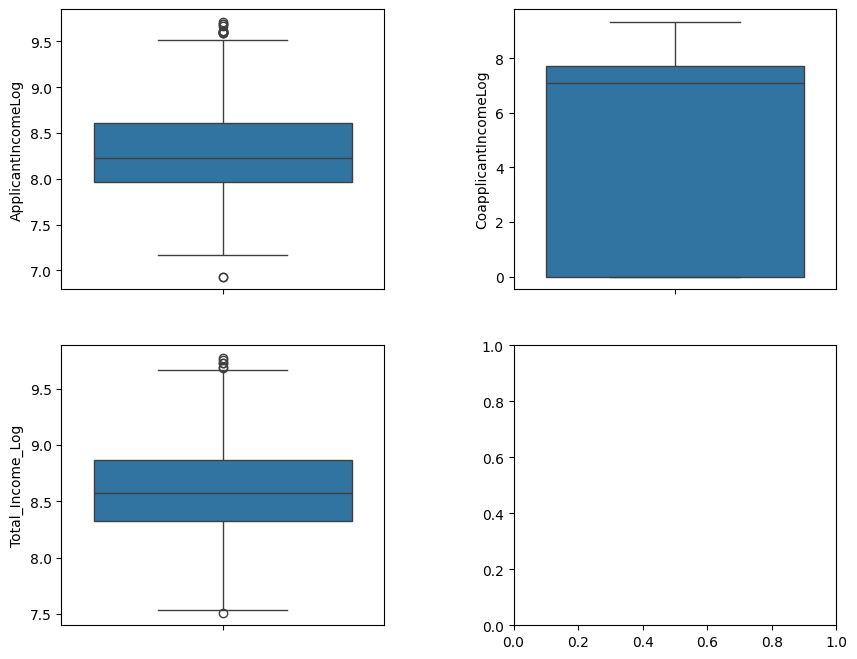

In [184]:
fig, axs = plt.subplots(2,2, figsize = (10,8))
plt1 = sns.boxplot(df['ApplicantIncomeLog'], ax = axs[0,0])
plt2 = sns.boxplot(df['CoapplicantIncomeLog'], ax = axs[0,1])
plt2 = sns.boxplot(df['Total_Income_Log'], ax = axs[1,0])
plt.subplots_adjust(wspace=0.4)

## Encoding


In [185]:
## Encoding Technique : Label Encoding, One Hot Encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le =  LabelEncoder()
for col in cols:
  df[col] =  le.fit_transform(df[col])

## Coorelation Matrix

<Axes: >

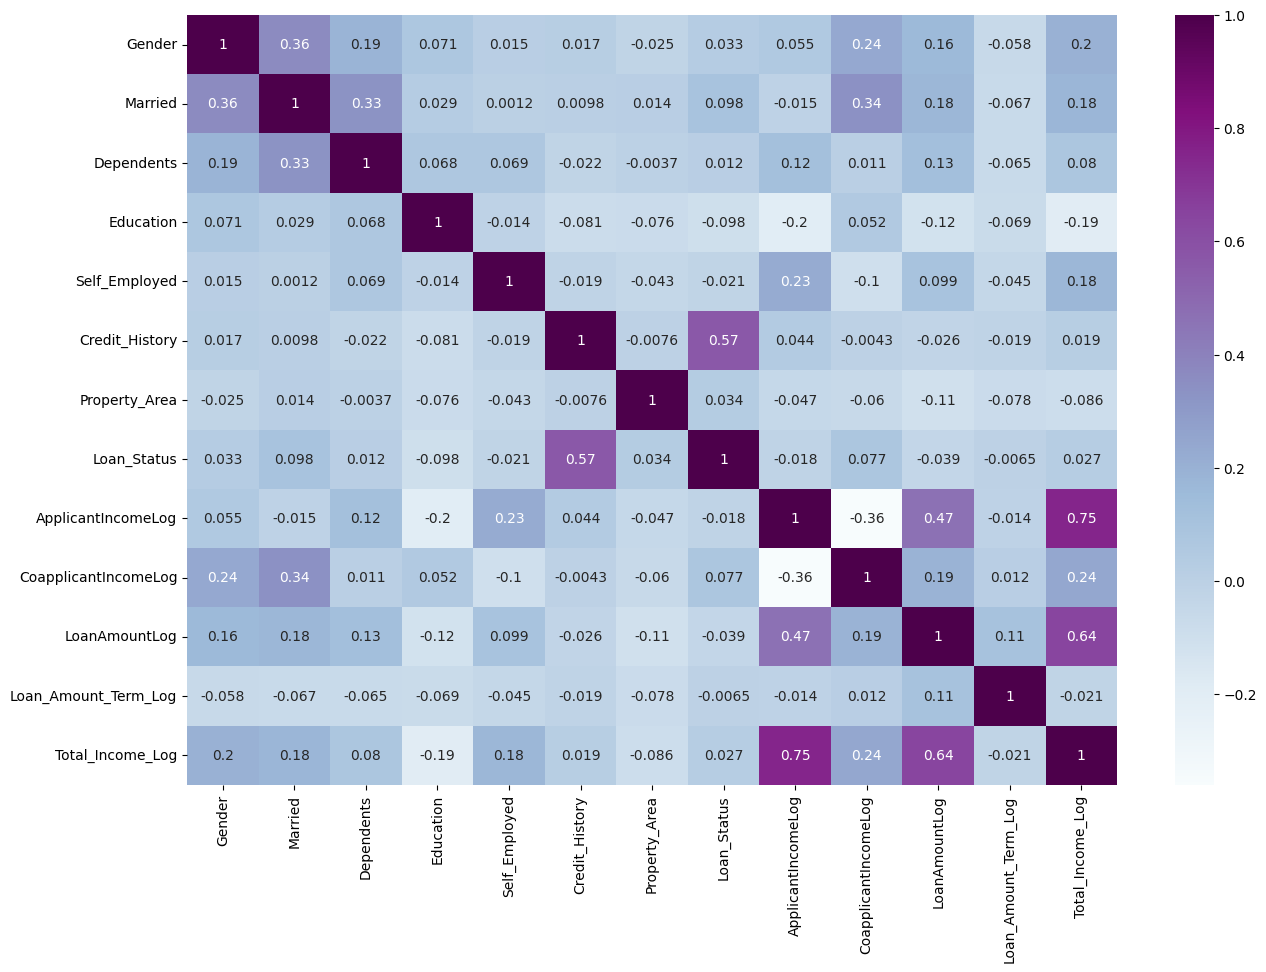

In [186]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

## Data Splitting

In [187]:
## Split Independent and dependent features

X = df.drop(columns = ['Loan_Status'],axis = 1)
y = df['Loan_Status']

## Scaling of the Data

In [188]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Train Test Split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)


## Logistic Regression

In [190]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [191]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix


y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regession:', accuracy_score(y_test, y_pred))
print('Precision of Logistic Regession:',precision_score(y_test, y_pred))

Accuracy of Logistic Regession: 0.8356164383561644
Precision of Logistic Regession: 0.8145161290322581


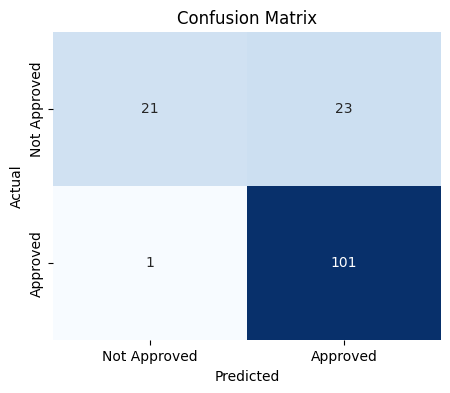

In [192]:
cfmx = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decison Tree


In [193]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [194]:
y_pred = dtc.predict(X_test)
print('Accuracy of Decision Tree Classifier:',accuracy_score(y_test, y_pred))
print('Precision of Decision Tree Classifier:',precision_score(y_test, y_pred))

Accuracy of Decision Tree Classifier: 0.7328767123287672
Precision of Decision Tree Classifier: 0.8387096774193549


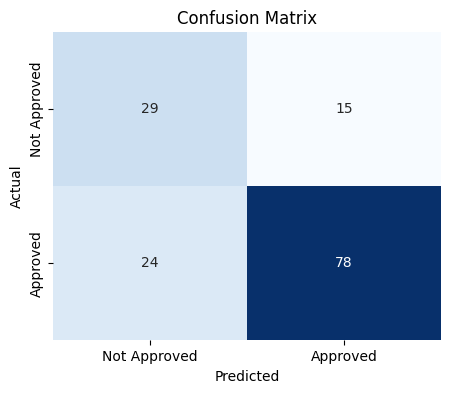

In [195]:
cfmx = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Machine

In [196]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [197]:
y_pred = svm.predict(X_test)
print('Accuracy of SVM Classifier:',accuracy_score(y_test, y_pred))
print('Precision of SVM Classifier:',precision_score(y_test, y_pred))

Accuracy of SVM Classifier: 0.8356164383561644
Precision of SVM Classifier: 0.8145161290322581


## Ensemble Methods Bagging and Boosting

In [198]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


# Bagging (Random Forest)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Boosting (AdaBoost with Decision Tree)
base_dt = DecisionTreeClassifier()
adaboost = AdaBoostClassifier(estimator=base_dt)  
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
print(f"AdaBoost Accuracy: {adaboost_accuracy}")


Random Forest Accuracy: 0.815068493150685
AdaBoost Accuracy: 0.7397260273972602


RandomForestClassifier() creates a Random Forest classifier for Bagging.

AdaBoostClassifier(base_estimator=base_dt) creates an AdaBoost classifier with Decision Tree as the base estimator for Boosting.

## Hyperparameter tuning

In [199]:
model = RandomForestClassifier(n_estimators=100,
                               min_samples_split=25, 
                               max_depth=7,
                               max_features=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of Random Forest Classifier:',accuracy_score(y_test, y_pred))
print('Precision of Random Forest Classifier:',precision_score(y_test, y_pred))

Accuracy of Random Forest Classifier: 0.815068493150685
Precision of Random Forest Classifier: 0.7952755905511811
